# Fair Binary Classification with SearchFair on two-dimensional toy data

Here, we present the use of SearchFair on toy data. 

## Imports

We start by importing SearchFair from the installed package.

In [1]:
from searchfair import SearchFair

Second, we load some necessary methods and numpy.

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import numpy as np

# We are ignoring cvxpys warning about disciplined programming rules. 
import warnings
warnings.filterwarnings('ignore')

## Loading toy dataset

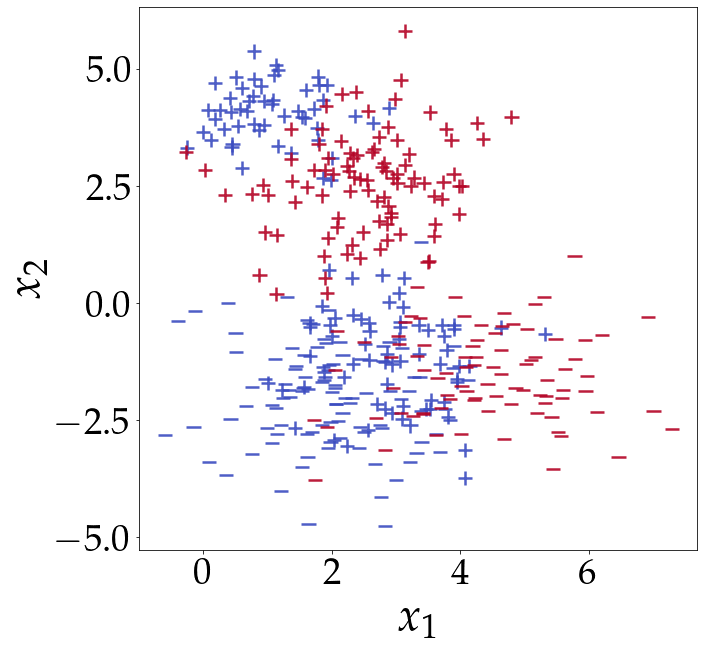

Total data points: 1500
# non-protected examples: 751
# protected examples: 749
# non-protected examples in positive class: 376 (50.1%)
# protected examples in positive class: 374 (49.9%)


In [3]:
from get_synthetic_data import get_gaussian_data
from get_synthetic_data import plot_boundaries
import utils as ut

n_samples = 1500
# Load Data
x_data, y_data, s_data = get_gaussian_data(n_samples=n_samples, plot_data=True)
ut.print_data_stats(s_data, y_data)
# Train Test split. Here, we choose a small number to reduce running time.
x_train, x_test, y_train, y_test, s_train, s_test = train_test_split(x_data, y_data, s_data, train_size=0.5, shuffle=True)

## Learning a fair classifier with SearchFair
### Demographic Parity

To learn a classifier with SearchFair, we need to choose a kernel between 'linear' and 'rbf', and we need to choose a fairness notion - either Demographic Parity (DDP) or Equality of Opportunity (DEO). Here, we start with a linear kernel and demographic parity. 

In [4]:
fairness_notion = 'DDP' # DDP = Demographic Parity, DEO = Equality of Opportunity. 
kernel = 'linear' # 'linear', 'rbf'
verbose = True # True = SearchFair output, 2 = show also solver progress

# Regularization Parameter beta
reg_beta = 0.0001
linear_model_DDP = SearchFair(reg_beta=reg_beta, kernel=kernel, fairness_notion=fairness_notion, verbose=verbose, reason_points=0.5)
linear_model_DDP.fit(x_train, y_train, s_train=s_train)

Preprocessing...
Compilation of CVXPY (might take a while for v1.1)
Testing lambda_min: 0.00
Obtained: DDP = 0.1906 with lambda = 0.0000
Testing lambda_max: 1.00
Obtained: DDP = -0.5076 with lambda = 1.0000
Starting Binary Search...
----------Iteration #0----------
Testing new Lambda: 0.5000
Obtained: DDP = -0.2721 with lambda = 0.5000
----------Iteration #1----------
Testing new Lambda: 0.2500
Obtained: DDP = 0.1688 with lambda = 0.2500
----------Iteration #2----------
Testing new Lambda: 0.3750
Obtained: DDP = -0.0224 with lambda = 0.3750
----------Iteration #3----------
Testing new Lambda: 0.3125
Obtained: DDP = 0.1088 with lambda = 0.3125
----------Iteration #4----------
Testing new Lambda: 0.3438
Obtained: DDP = 0.0508 with lambda = 0.3438
----------Iteration #5----------
Testing new Lambda: 0.3594
Obtained: DDP = 0.0207 with lambda = 0.3594
----------Iteration #6----------
Testing new Lambda: 0.3672
Obtained: DDP = -0.0051 with lambda = 0.3672
Sufficient fairness obtained before 

SearchFair(reason_points=0.5, reg_beta=0.0001, verbose=True)

In [5]:
def print_clf_stats(model, x_train, x_test, y_train, y_test, s_train, s_test):
    train_acc = ut.get_accuracy(np.sign(model.predict(x_train)), y_train)
    test_acc = ut.get_accuracy(np.sign(model.predict(x_test)), y_test)
    test_DDP, test_DEO = ut.compute_fairness_measures(model.predict(x_test), y_test, s_test)
    train_DDP, train_DEO = ut.compute_fairness_measures(model.predict(x_train), y_train, s_train)

    print(10*'-'+"Train"+10*'-')
    print("Accuracy: %0.4f%%" % (train_acc * 100))
    print("DDP: %0.4f%%" % (train_DDP * 100), "DEO: %0.4f%%" % (train_DEO * 100))
    print(10*'-'+"Test"+10*'-')
    print("Accuracy: %0.4f%%" % (test_acc * 100))
    print("DDP: %0.4f%%" % (test_DDP * 100), "DEO: %0.4f%%" % (test_DEO * 100))

Let us check the accuracy and fairness results on the dataset. 

In [6]:
print_clf_stats(linear_model_DDP, x_train, x_test, y_train, y_test, s_train, s_test)

----------Train----------
Accuracy: 80.9333%
DDP: -0.5147% DEO: 30.6416%
----------Test----------
Accuracy: 78.6667%
DDP: 2.2044% DEO: 34.7401%


Finally, we can take a look at the classifier for this dataset. 

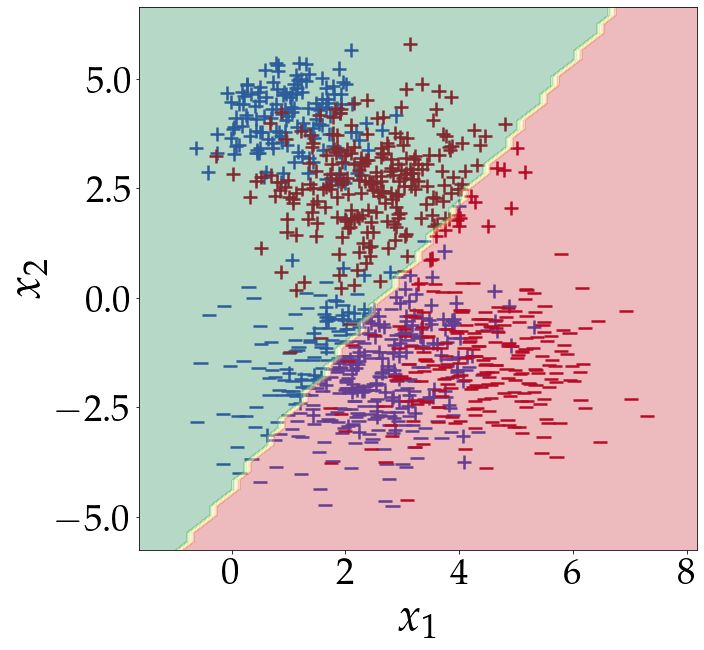

In [7]:
plot_boundaries(linear_model_DDP, x_data, y_data, s_data, num_to_draw=1000)

### Equality of Opportunity

Now, let us improve Equality of Opportunity using an rbf kernel. 

In [8]:
fairness_notion = 'DEO' # DDP = Demographic Parity, DEO = Equality of Opportunity. 
kernel = 'rbf' # 'linear', 'rbf'
verbose = True

# Regularization Parameter beta
reg_beta = 0.0001
rbf_model_DEO = SearchFair(reg_beta=reg_beta, kernel=kernel, fairness_notion=fairness_notion, verbose=verbose)
rbf_model_DEO.fit(x_train, y_train, s_train=s_train)

# Evaluate model
print_clf_stats(rbf_model_DEO, x_train, x_test, y_train, y_test, s_train, s_test)

Preprocessing...
Compilation of CVXPY (might take a while for v1.1)
Testing lambda_min: 0.00
Obtained: DEO = 0.3939 with lambda = 0.0000
Testing lambda_max: 1.00
Obtained: DEO = -0.7672 with lambda = 1.0000
Starting Binary Search...
----------Iteration #0----------
Testing new Lambda: 0.5000
Obtained: DEO = -0.6616 with lambda = 0.5000
----------Iteration #1----------
Testing new Lambda: 0.2500
Obtained: DEO = 0.2915 with lambda = 0.2500
----------Iteration #2----------
Testing new Lambda: 0.3750
Obtained: DEO = -0.4338 with lambda = 0.3750
----------Iteration #3----------
Testing new Lambda: 0.3125
Obtained: DEO = -0.3529 with lambda = 0.3125
----------Iteration #4----------
Testing new Lambda: 0.2812
Obtained: DEO = -0.1004 with lambda = 0.2812
----------Iteration #5----------
Testing new Lambda: 0.2656
Obtained: DEO = 0.2808 with lambda = 0.2656
----------Iteration #6----------
Testing new Lambda: 0.2734
Obtained: DEO = 0.1356 with lambda = 0.2734
----------Iteration #7----------
Te

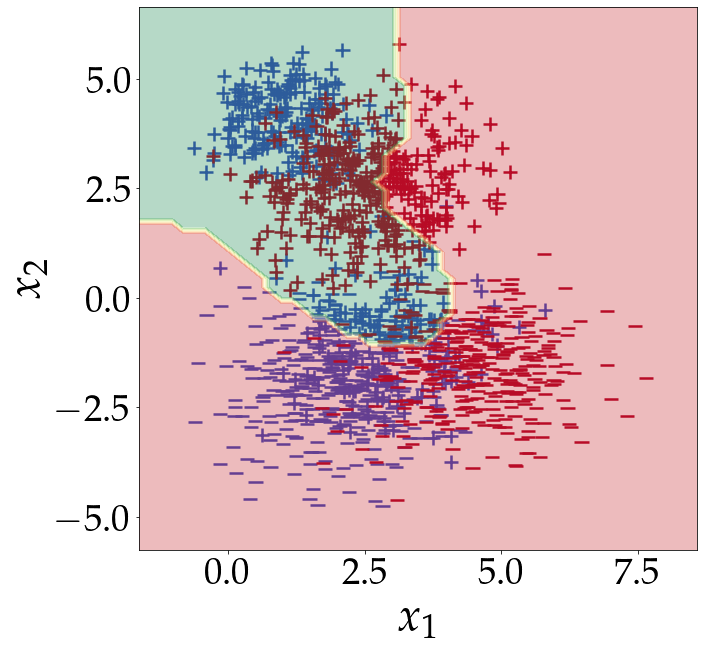

In [9]:
plot_boundaries(rbf_model_DEO, x_data, y_data, s_data)